In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pca pip install pca

from pca import pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/bin/bash: line 1: pca: command not found


ModuleNotFoundError: No module named 'pca'

# Analysis of Reflectance and Transmission Spec Measurement
This dataset contains data on Near-Infrared (NIR) spectra measured on white feathers from a variety of birds (50 species). The researchers studied the microstructure of white feathers that predicts their visible and near-infrared reflectance properties. Results were positive and may inform design of functional materials to control light and heat. It is a starting point for bio-inspired design of materials.

Properties:
- NIR spectra can be considered 1D images.
- First column contains wavelength
- Other columns contain observations
- Data is transposed

**Research question**: do birds share the same property?

**Rationale for method**: this analysis will make use of PCA. The data consists of 901 wavelengths. This dimension is too high to analyze. With PCA we are able to reduce the dimensions and visualize the data. We can find out what wavelengths explain the most variance.

**Expectations**: I expect that PCA is able to reduce the dimensions. In addition, I think we can see clusters of bird. Birds with the same 'characteristics' will form groups. Once this behaviour is observed, researched can look further into the groups to start designing bio-inspired materials.

In [3]:
df = pd.read_excel('../reflectance and transmission spec measurements.xlsx')
df = df
df.head()

wavelength  AacuW_B_Splice17_1.txt  AacuW_B_Splice17_2.txt  \
0         300               13.673750               12.762500   
1         302               14.103333               13.244167   
2         304               14.608824               13.850000   
3         306               14.941905               14.277619   
4         308               15.787273               15.200000   

   AacuW_B_Splice17_3.txt  AacuW_W_Splice17_1.txt  AacuW_W_Splice17_2.txt  \
0               13.027500               15.468750               14.433750   
1               13.402500               15.695833               14.756667   
2               14.061765               16.164118               15.320588   
3               14.519048               16.571905               15.794286   
4               15.480909               17.307727               16.595000   

   AacuW_W_Splice17_3.txt  AclyW_B_Splice17_1.txt  AclyW_B_Splice17_2.txt  \
0               14.433750               11.453750               10.155000   
1               14.756667               11.711667               10.520000   
2               15.320588               11.888824               10.884118   
3               15.794286               12.136667               11.240000   
4               16.595000               12.680455               11.963182   

   AclyW_B_Splice17_3.txt  ...  TmelW_B_Splice17_3.txt  \
0               10.977500  ...               12.127500   
1               11.128333  ...               12.577500   
2               10.999412  ...               13.080000   
3               10.985238  ...               13.406190   
4               11.224545  ...               14.182727   

   TmelW_W_Splice17_1.txt  TmelW_W_Splice17_2.txt  TmelW_W_Splice17_3.txt  \
0               16.188750               17.625000               18.411250   
1               16.595833               18.152500               18.995833   
2               17.232941               18.832353               19.781765   
3               17.633810               19.344286               20.330000   
4               18.449545               20.428636               21.374091   

   TmigW_B_Splice17_1.txt  TmigW_B_Splice17_2.txt  TmigW_B_Splice17_3.txt  \
0               10.313750                9.540000               10.956250   
1               10.715000               10.138333               11.382500   
2               11.049412               10.479412               11.774118   
3               11.304762               10.551429               12.022381   
4               11.955455               11.014545               12.571364   

   TmigW_W_Splice17_1.txt  TmigW_W_Splice17_2.txt  TmigW_W_Splice17_3.txt  
0               17.210000               20.263750               16.757500  
1               17.425833               20.562500               17.045000  
2               17.777647               20.922941               17.643529  
3               18.082857               21.206190               18.090000  
4               18.876818               21.934091               18.904545  

[5 rows x 439 columns]

In [4]:
df.shape

(901, 439)

**Selectio of data**:

The data is transposed:
- The variables are the `wavelength`.
- The observations are the `*.txt` columns.

Therefore we need to extract the header (wavelength), and transpose the remaining data.

In [5]:
headers = df['wavelength']
data = df.drop(columns=['wavelength']).T
data.head()

0          1          2          3          4    \
AacuW_B_Splice17_1.txt  13.67375  14.103333  14.608824  14.941905  15.787273   
AacuW_B_Splice17_2.txt  12.76250  13.244167  13.850000  14.277619  15.200000   
AacuW_B_Splice17_3.txt  13.02750  13.402500  14.061765  14.519048  15.480909   
AacuW_W_Splice17_1.txt  15.46875  15.695833  16.164118  16.571905  17.307727   
AacuW_W_Splice17_2.txt  14.43375  14.756667  15.320588  15.794286  16.595000   

                              5          6          7          8          9    \
AacuW_B_Splice17_1.txt  16.626818  17.571364  18.882273  19.949091  21.080952   
AacuW_B_Splice17_2.txt  16.105455  16.895909  17.873182  18.725000  19.853810   
AacuW_B_Splice17_3.txt  16.434545  17.379545  18.461818  19.334545  20.324762   
AacuW_W_Splice17_1.txt  18.067727  19.127727  20.591364  21.665000  22.999048   
AacuW_W_Splice17_2.txt  17.301364  18.202273  19.527727  20.621818  22.085714   

                        ...      891      892     893     894      895  \
AacuW_B_Splice17_1.txt  ...  44.1825  44.4625  44.574  44.794  44.9075   
AacuW_B_Splice17_2.txt  ...  44.1700  44.4600  44.578  44.812  44.9300   
AacuW_B_Splice17_3.txt  ...  43.8650  44.1500  44.268  44.506  44.6275   
AacuW_W_Splice17_1.txt  ...  56.6025  57.1050  57.320  57.738  57.9500   
AacuW_W_Splice17_2.txt  ...  56.4250  56.9275  57.144  57.570  57.7850   

                            896      897    898      899     900  
AacuW_B_Splice17_1.txt  45.0700  45.2125  45.33  45.4375  45.476  
AacuW_B_Splice17_2.txt  45.1000  45.2450  45.35  45.4300  45.452  
AacuW_B_Splice17_3.txt  44.8150  44.9775  45.09  45.1825  45.218  
AacuW_W_Splice17_1.txt  58.2825  58.5650  58.78  58.9500  59.000  
AacuW_W_Splice17_2.txt  58.1250  58.4050  58.62  58.7775  58.812  

[5 rows x 901 columns]

In [9]:
X = data.values
X

array([[13.67375   , 14.10333333, 14.60882353, ..., 45.33      ,
        45.4375    , 45.476     ],
       [12.7625    , 13.24416667, 13.85      , ..., 45.35      ,
        45.43      , 45.452     ],
       [13.0275    , 13.4025    , 14.06176471, ..., 45.09      ,
        45.1825    , 45.218     ],
       ...,
       [17.21      , 17.42583333, 17.77764706, ..., 77.3125    ,
        77.3725    , 77.374     ],
       [20.26375   , 20.5625    , 20.92294118, ..., 77.9075    ,
        77.9825    , 77.988     ],
       [16.7575    , 17.045     , 17.64352941, ..., 78.3225    ,
        78.385     , 78.392     ]])

In [10]:
X.var(axis=0).min(), X.var(axis=0).max()

(35.03075470769871, 921.7073672813875)

**Treatment of data**:

PCA requires the data to be centered. If the data does not have consistent variance across columns, we need to divide by the standard deviation. For this, we use the `StandardScaler` from sklearn (could have done it manually, as it is rather easy).

In [11]:
X = data.values
X = StandardScaler().fit_transform(X)

NameError: name 'StandardScaler' is not defined

The data is now standardized. We want to use PCA, find the eigenvalues and plot them in a `scree plot`.

First we initialize the PCA with 5 components. This is just for exploration. This could have been any number as long as it is smaller than the amount of columns, ofcourse.

In [17]:
n = 5
pca = PCA(n_components=5)

In [18]:
components = pca.fit_transform(X)

Lets print the explained variance ratio. This ratio shows how much variation each component explains. 

In [13]:
pca.explained_variance_ratio_

array([0.82255313, 0.16139144, 0.01109996, 0.00220678, 0.00173189])

As we can see, the first and second component explain most variance. The third and later components do not contribute that much. We can also look at a scree plot.

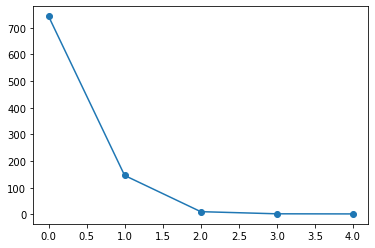

In [17]:
plt.plot(pca.explained_variance_, 'o-')

The scree plot also confirms that there is a drop in contribution after the second component. We will pick **2** components, as those explain more than 90% of the variance.

In [19]:
# I'm picking 3 components, so we can have some colours for visualization.
n = 3
pca = PCA(n_components=n)
components = pca.fit_transform(X)

labels = [f'Component {i}' for i in range(1, n+1)]
component_df = pd.DataFrame(data=components, columns=labels)
component_df.head()

Component 1  Component 2  Component 3
0     3.589369    -9.302556    -1.098359
1     2.614863    -8.912538    -0.128039
2     3.626704    -8.707143    -0.354845
3   -28.314820    -6.835662     4.912559
4   -27.473184    -6.481229     5.343839

Lets plot the component in a scatter plot, to see if we can see clusters.

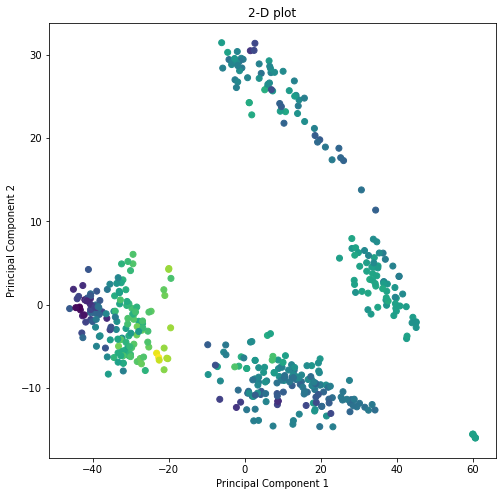

In [20]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2-D plot')

ax.scatter(components[:, 0], components[:, 1], c=components[:, 2])

We can see that four bigger clusters arise. Not every value belongs to a cluster. The clusters indicate that the observations share some properties.

I load another pca package to easily plot the results.

In [21]:
from pca import pca

In [23]:
model = pca(normalize=False)

# need to convert the header to strings, otherwise it will be interpreted as integers.
labels = [str(val) for val in header]

In [24]:
results = model.fit_transform(X, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [901] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [901] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.


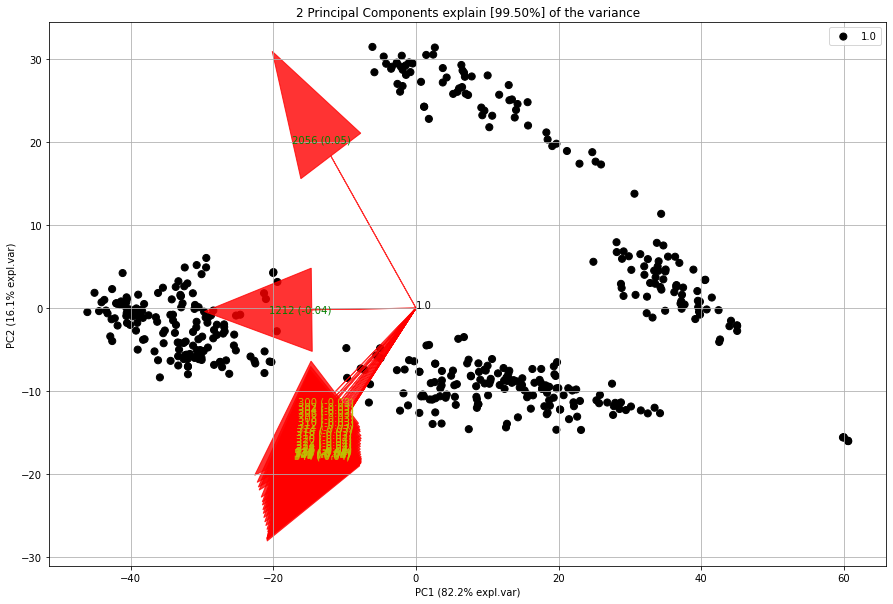

In [28]:
model.biplot()
plt.show()

In [27]:
results['topfeat']

PC feature   loading  type
0    PC1    1212 -0.036462  best
1    PC2    2056  0.045674  best
2    PC1     300 -0.028403  weak
3    PC1     302 -0.028259  weak
4    PC1     304 -0.028289  weak
..   ...     ...       ...   ...
896  PC2    2092  0.043812  weak
897  PC2    2094  0.043699  weak
898  PC2    2096  0.043595  weak
899  PC2    2098  0.043501  weak
900  PC2    2100  0.043456  weak

[901 rows x 4 columns]

**Interpretation and reflection**

Here we can see that wavelength **1212** mostly contributes to principal component 1 and (almost) not to component 2.Wavelength **2056** contributes most to component 2. We can also see many wavelengths that are more or less anticorrelated with the second component.

Researchers may look more into wavelength **1212** to discover the effects on the observations. They may be able to find new materials that can copy the mechanisms in the bird, shown in the left-middle cluster.